In [1]:
import sklearn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as MSE
import xarray as xr
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pathfig = '/home1/datawork/epauthen/Fig_Product/Figure_clean/'

In [2]:
ds = xr.open_dataset("/home/datawork-lops-bluecloud/osnet/Fig_explicability/shap_values_EXP1_300.nc")
print(ds)

<xarray.Dataset>
Dimensions:              (N_PROF: 300, model: 15, input_name: 12, PRES_INTERPOLATED: 51)
Coordinates:
  * input_name           (input_name) object 'sla' 'lat' 'lon' ... 'SST' 'bathy'
  * PRES_INTERPOLATED    (PRES_INTERPOLATED) int64 0 1 2 3 ... 773 857 950 1000
Dimensions without coordinates: N_PROF, model
Data variables:
    TEMP_importance      (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    PSAL_importance      (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    MLD_importance       (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    TEMP_abs_importance  (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    PSAL_abs_importance  (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...
    MLD_abs_importance   (N_PROF, model, input_name, PRES_INTERPOLATED) float64 ...


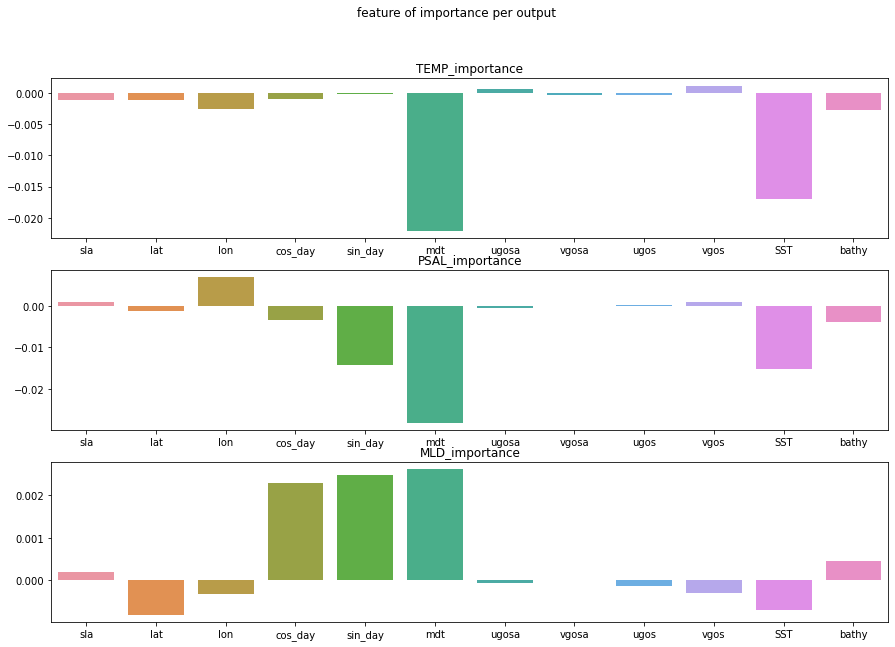

In [3]:
import seaborn as sns

fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('feature of importance per output')
for i, var in enumerate(['TEMP_importance', 'PSAL_importance', 'MLD_importance']):
    sns.barplot(ax=ax[i], x=ds['input_name'].data, y=ds[var].mean(dim=['N_PROF', 'model', 'PRES_INTERPOLATED']))
    ax[i].set_title(f"{var}")

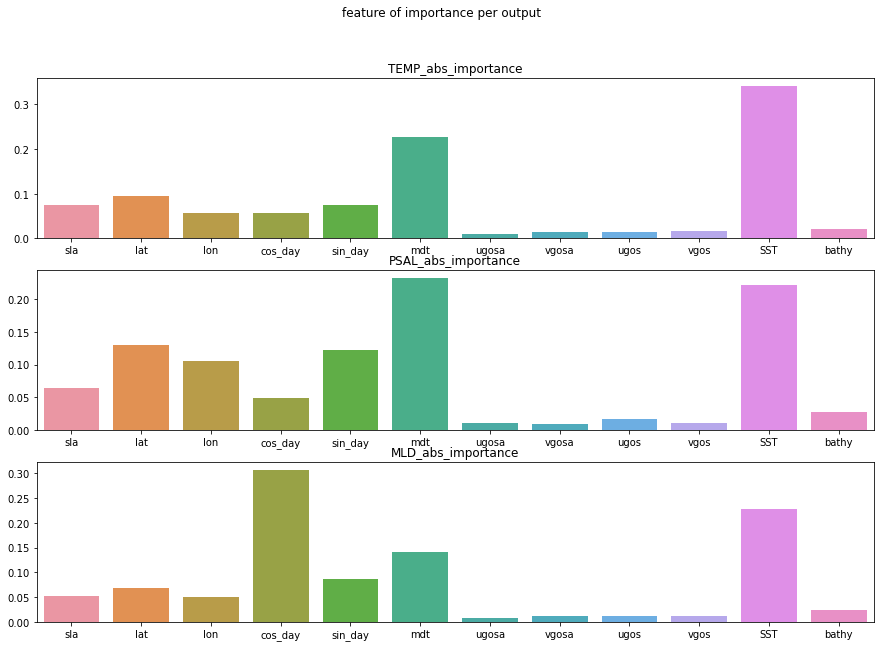

In [4]:
fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('feature of importance per output')
for i, var in enumerate(['TEMP_abs_importance', 'PSAL_abs_importance', 'MLD_abs_importance']):
    importance_val = ds[var].mean(dim=['N_PROF', 'model', 'PRES_INTERPOLATED'])/sum(ds[var].mean(dim=['N_PROF', 'model', 'PRES_INTERPOLATED']))
    sns.barplot(ax=ax[i], x=ds['input_name'].data, y=importance_val)
    ax[i].set_title(f"{var}")

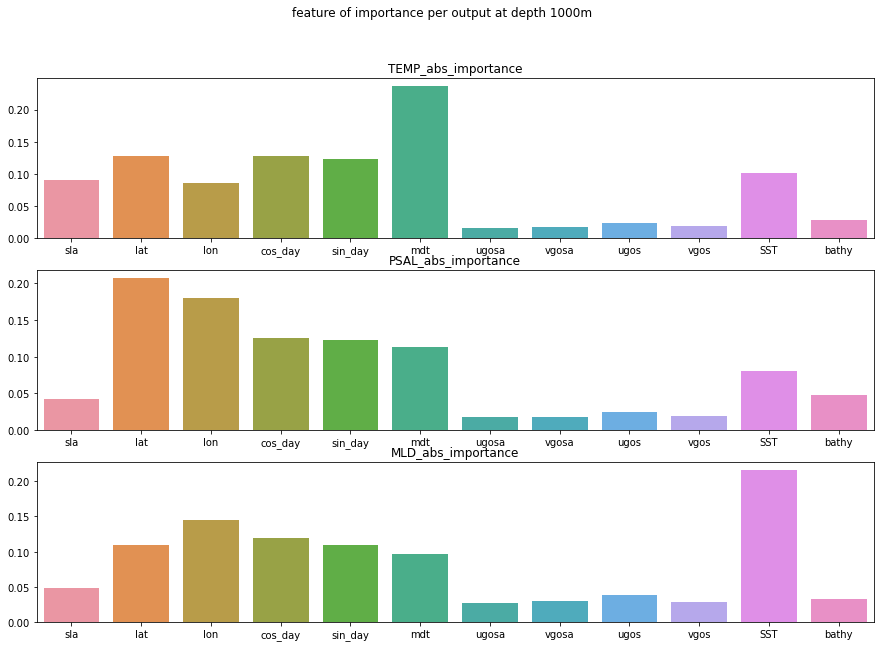

In [5]:
fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('feature of importance per output at depth 1000m')
for i, var in enumerate(['TEMP_abs_importance', 'PSAL_abs_importance', 'MLD_abs_importance']):
    importance_val = ds[var].mean(dim=['N_PROF', 'model']).sel(PRES_INTERPOLATED=1000)/sum(ds[var].mean(dim=['N_PROF', 'model']).sel(PRES_INTERPOLATED=1000))
    sns.barplot(ax=ax[i], x=ds['input_name'].data, y=importance_val)
    ax[i].set_title(f"{var}")

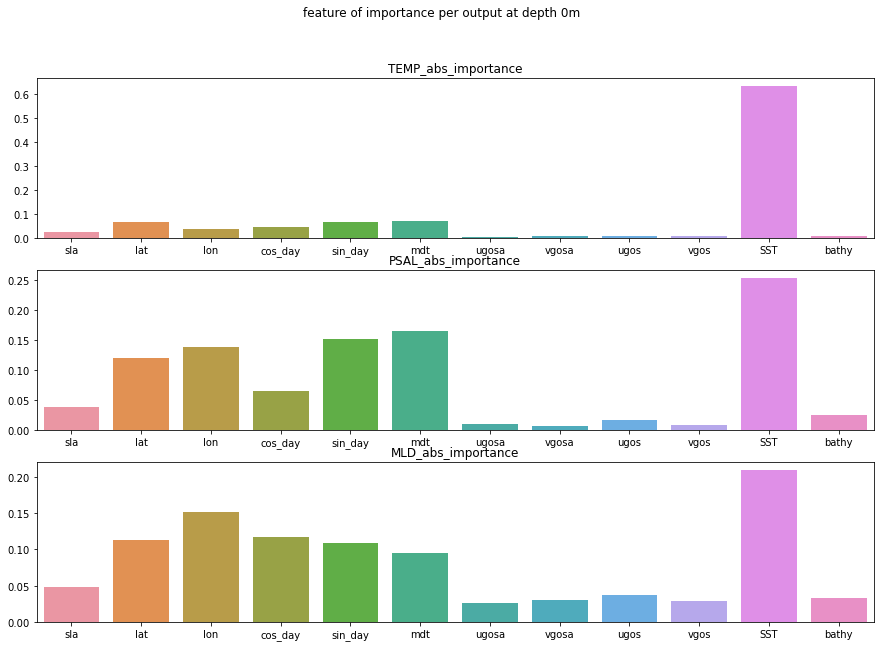

In [6]:
fig, ax = plt.subplots(3, figsize=(15, 10))
fig.suptitle('feature of importance per output at depth 0m')
for i, var in enumerate(['TEMP_abs_importance', 'PSAL_abs_importance', 'MLD_abs_importance']):
    importance_val = ds[var].mean(dim=['N_PROF', 'model']).sel(PRES_INTERPOLATED=0)/sum(ds[var].mean(dim=['N_PROF', 'model']).sel(PRES_INTERPOLATED=0))
    sns.barplot(ax=ax[i], x=ds['input_name'].data, y=importance_val)
    ax[i].set_title(f"{var}")

In [5]:
ds_depth = ds.mean(dim=['N_PROF', 'model'])


In [6]:
ds_depth['TEMP_abs_importance'] = ds_depth['TEMP_abs_importance']/ds_depth['TEMP_abs_importance'].sum(dim='input_name')
ds_depth['PSAL_abs_importance'] = ds_depth['PSAL_abs_importance']/ds_depth['PSAL_abs_importance'].sum(dim='input_name')
ds_depth['MLD_abs_importance'] = ds_depth['MLD_abs_importance']/ds_depth['MLD_abs_importance'].sum(dim='input_name')
ds_depth = ds_depth.drop(['TEMP_importance', 'PSAL_importance', 'MLD_importance'])
ds_depth

<xarray.Dataset>
Dimensions:              (input_name: 12, PRES_INTERPOLATED: 51)
Coordinates:
  * input_name           (input_name) object 'sla' 'lat' 'lon' ... 'SST' 'bathy'
  * PRES_INTERPOLATED    (PRES_INTERPOLATED) int64 0 1 2 3 ... 773 857 950 1000
Data variables:
    TEMP_abs_importance  (input_name, PRES_INTERPOLATED) float64 0.02545 ... ...
    PSAL_abs_importance  (input_name, PRES_INTERPOLATED) float64 0.03762 ... ...
    MLD_abs_importance   (input_name, PRES_INTERPOLATED) float64 0.04774 ... ...

In [7]:
ds_depth['TEMP_abs_importance'].var(dim='PRES_INTERPOLATED')

<xarray.DataArray 'TEMP_abs_importance' (input_name: 12)>
array([1.63771032e-03, 1.16691666e-03, 1.35414539e-04, 7.14552088e-04,
       3.54493349e-04, 2.26359293e-02, 1.31539596e-05, 1.05629258e-05,
       3.91988489e-05, 2.79927612e-05, 4.43055758e-02, 3.73251006e-05])
Coordinates:
  * input_name  (input_name) object 'sla' 'lat' 'lon' ... 'vgos' 'SST' 'bathy'

In [8]:
ds_depth = ds_depth.assign(variables={"var_T": (('input_name'), ds_depth['TEMP_abs_importance'].var(dim='PRES_INTERPOLATED').data)})
ds_depth

<xarray.Dataset>
Dimensions:              (input_name: 12, PRES_INTERPOLATED: 51)
Coordinates:
  * input_name           (input_name) object 'sla' 'lat' 'lon' ... 'SST' 'bathy'
  * PRES_INTERPOLATED    (PRES_INTERPOLATED) int64 0 1 2 3 ... 773 857 950 1000
Data variables:
    TEMP_abs_importance  (input_name, PRES_INTERPOLATED) float64 0.02545 ... ...
    PSAL_abs_importance  (input_name, PRES_INTERPOLATED) float64 0.03762 ... ...
    MLD_abs_importance   (input_name, PRES_INTERPOLATED) float64 0.04774 ... ...
    var_T                (input_name) float64 0.001638 0.001167 ... 3.733e-05

In [9]:
ds_depth = ds_depth.sortby('var_T')

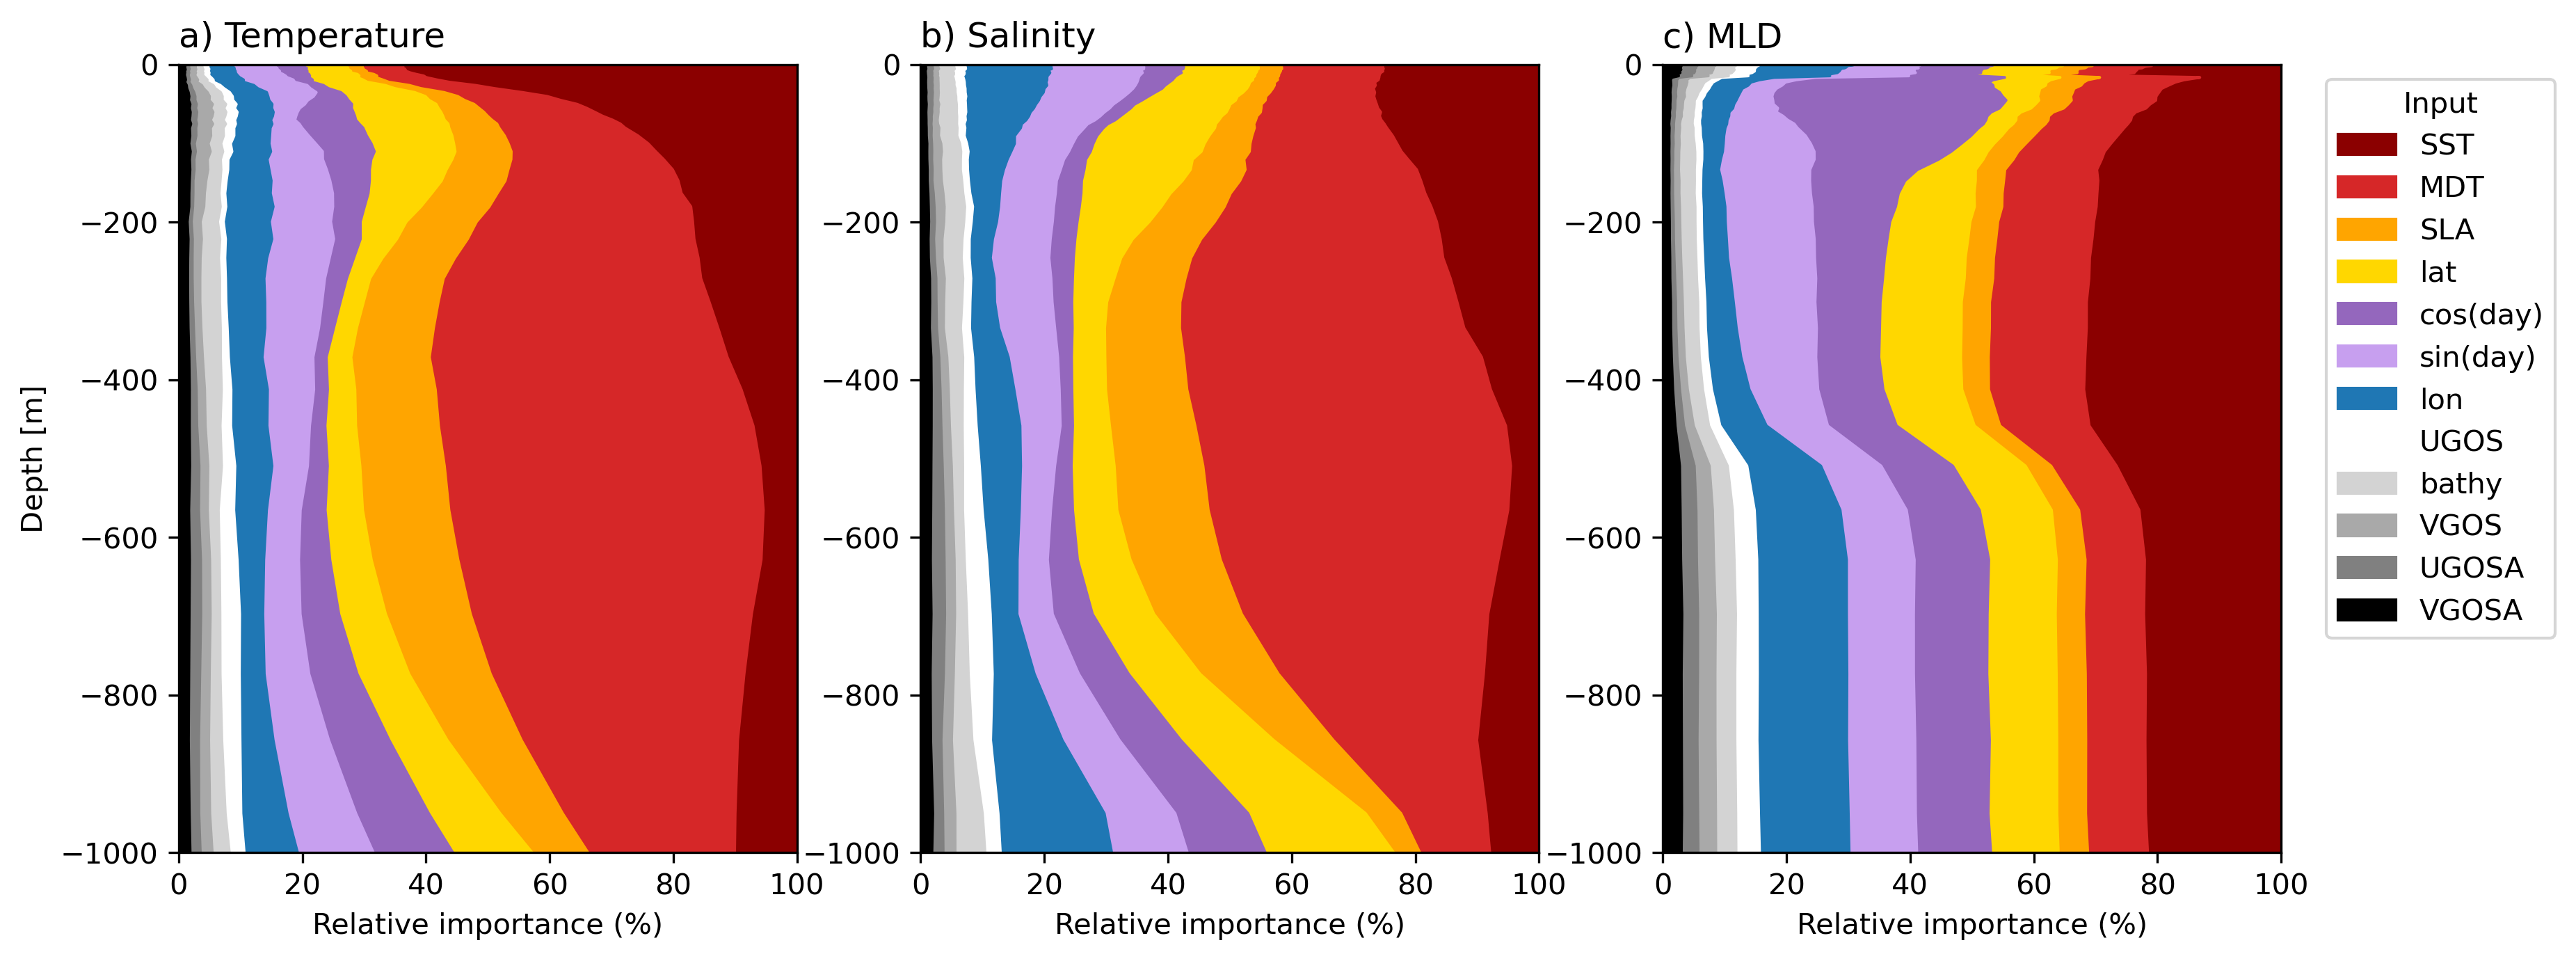

In [10]:
cmap_perso = ['k', 'grey', 'darkgray', 'lightgrey', 'white', 'tab:blue', '#C79FEF', 'tab:purple','#FFD700', '#FFA500', 'tab:red', 'darkred']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5),dpi = 300)

sum_area_T = np.zeros(51)
sum_area_S = np.zeros(51)
sum_area_M = np.zeros(51)

for i, name in enumerate(ds_depth['input_name'].data):
    
    ax[0].fill_betweenx(-ds_depth['PRES_INTERPOLATED'].data, 100*(sum_area_T + ds_depth.sel(input_name=name)['TEMP_abs_importance'].data), label=name, zorder=-i, color=cmap_perso[i])
    sum_area_T = sum_area_T + ds_depth.sel(input_name=name)['TEMP_abs_importance'].data
    
    ax[1].fill_betweenx(-ds_depth['PRES_INTERPOLATED'].data, 100*(sum_area_S + ds_depth.sel(input_name=name)['PSAL_abs_importance'].data), label=name, zorder=-i, color=cmap_perso[i])
    sum_area_S = sum_area_S + ds_depth.sel(input_name=name)['PSAL_abs_importance'].data
    
    ax[2].fill_betweenx(-ds_depth['PRES_INTERPOLATED'].data, 100*(sum_area_M + ds_depth.sel(input_name=name)['MLD_abs_importance'].data), label=name, zorder=-i, color=cmap_perso[i])
    sum_area_M = sum_area_M + ds_depth.sel(input_name=name)['MLD_abs_importance'].data

ax[0].set_ylabel("Depth [m]")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[0].set_title('a) Temperature',loc = "left")
ax[1].set_title('b) Salinity',loc = "left")
ax[2].set_title('c) MLD',loc = "left")  
for i in np.arange(3):
    ax[i].set_xlabel("Relative importance (%)")
    ax[i].set_xlim([0,100])
    ax[i].set_ylim([-1000,0])

handles, labels = ax[2].get_legend_handles_labels()
labels = ['VGOSA','UGOSA', 'VGOS', 'bathy','UGOS', 'lon', 'sin(day)', 'cos(day)', 'lat', 'SLA','MDT', 'SST']
plt.legend(handles[::-1], labels[::-1], title='Input', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig(pathfig + 'Final_Figure/Fig11.png', transparent=False)

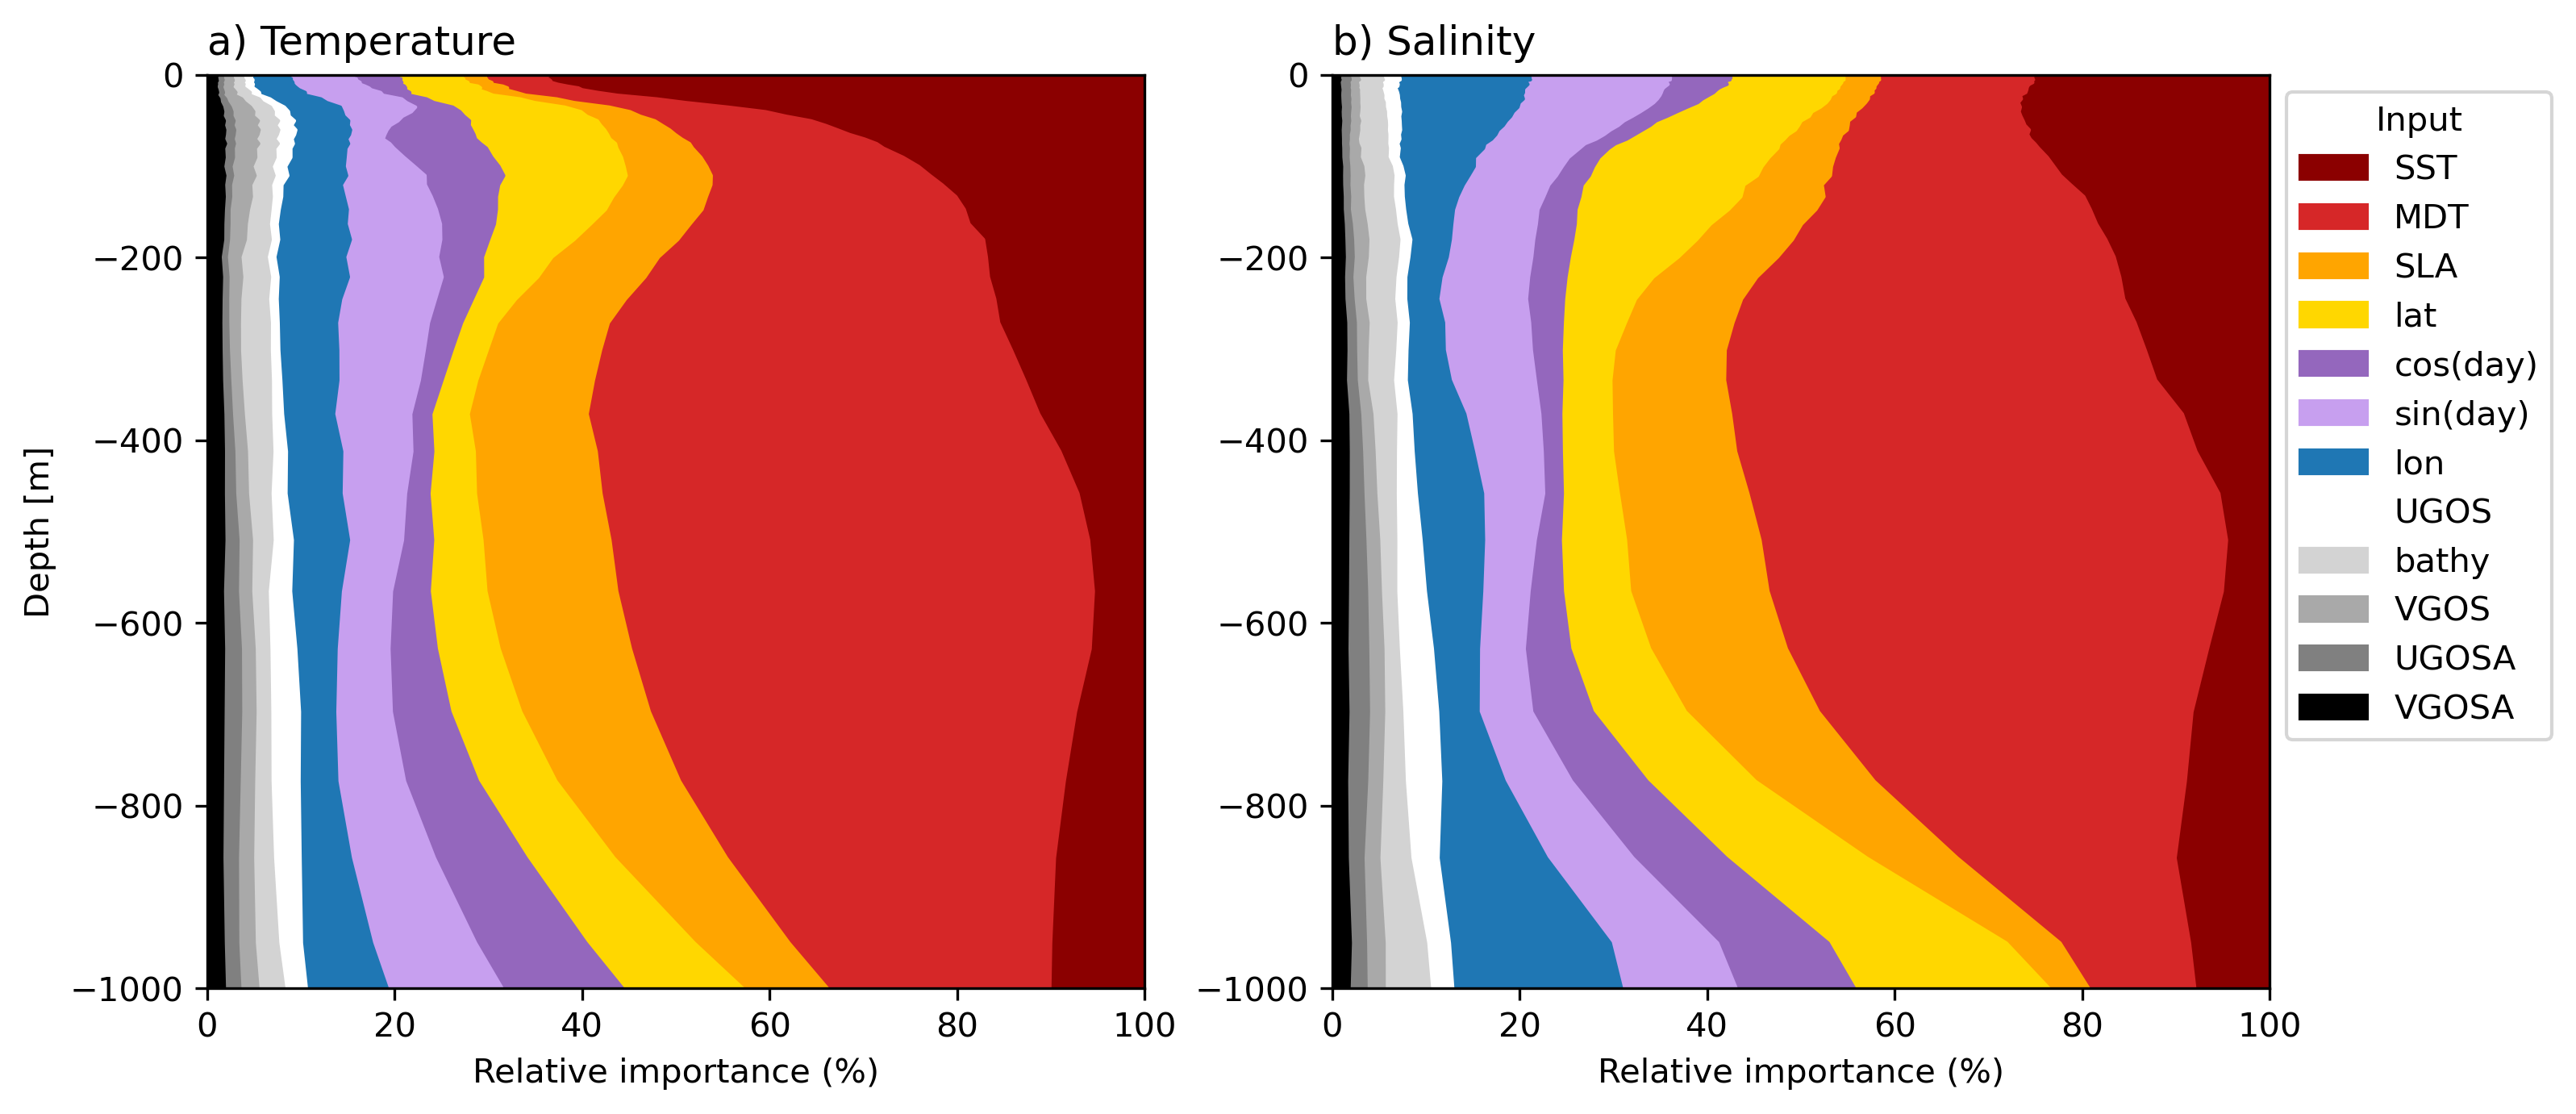

In [11]:
cmap_perso = ['k', 'grey', 'darkgray', 'lightgrey', 'white', 'tab:blue', '#C79FEF', 'tab:purple','#FFD700', '#FFA500', 'tab:red', 'darkred']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(11, 5),dpi = 300)

sum_area_T = np.zeros(51)
sum_area_S = np.zeros(51)
sum_area_M = np.zeros(51)

for i, name in enumerate(ds_depth['input_name'].data):
    
    ax[0].fill_betweenx(-ds_depth['PRES_INTERPOLATED'].data, 100*(sum_area_T + ds_depth.sel(input_name=name)['TEMP_abs_importance'].data), label=name, zorder=-i, color=cmap_perso[i])
    sum_area_T = sum_area_T + ds_depth.sel(input_name=name)['TEMP_abs_importance'].data
    
    ax[1].fill_betweenx(-ds_depth['PRES_INTERPOLATED'].data, 100*(sum_area_S + ds_depth.sel(input_name=name)['PSAL_abs_importance'].data), label=name, zorder=-i, color=cmap_perso[i])
    sum_area_S = sum_area_S + ds_depth.sel(input_name=name)['PSAL_abs_importance'].data
    
ax[0].set_ylabel("Depth [m]")
ax[1].set_ylabel("")
ax[0].set_title('a) Temperature',loc = "left")
ax[1].set_title('b) Salinity',loc = "left")
for i in np.arange(2):
    ax[i].set_xlabel("Relative importance (%)")
    ax[i].set_xlim([0,100])
    ax[i].set_ylim([-1000,0])

handles, labels = ax[1].get_legend_handles_labels()
labels = ['VGOSA','UGOSA', 'VGOS', 'bathy','UGOS', 'lon', 'sin(day)', 'cos(day)', 'lat', 'SLA','MDT', 'SST']
plt.legend(handles[::-1], labels[::-1], title='Input', bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig(pathfig + 'Final_Figure/Fig11.png', transparent=False)


# Plot plofiles with std model

In [ ]:
ds_model = ds.mean(dim=['N_PROF'])
ds_model = ds_model[['TEMP_abs_importance', 'PSAL_abs_importance', 'MLD_abs_importance']]

ds_model['TEMP_abs_importance'] = ds_model['TEMP_abs_importance']/ds_model['TEMP_abs_importance'].sum(dim='input_name')
ds_model['PSAL_abs_importance'] = ds_model['PSAL_abs_importance']/ds_model['PSAL_abs_importance'].sum(dim='input_name')
ds_model['MLD_abs_importance'] = ds_model['MLD_abs_importance']/ds_model['MLD_abs_importance'].sum(dim='input_name')


ds_model = ds_model.assign(variables={"std_T": (('input_name', 'PRES_INTERPOLATED'), ds_model['TEMP_abs_importance'].std(dim='model'))})
ds_model = ds_model.assign(variables={"std_S": (('input_name', 'PRES_INTERPOLATED'), ds_model['PSAL_abs_importance'].std(dim='model'))})
ds_model = ds_model.assign(variables={"std_MLD": (('input_name', 'PRES_INTERPOLATED'), ds_model['MLD_abs_importance'].std(dim='model'))})
ds_model = ds_model.mean(dim='model')
ds_model

In [ ]:
cmap_perso = ['k', 'm', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))

sum_area_T = np.zeros(51)
sum_area_S = np.zeros(51)
sum_area_M = np.zeros(51)

for i, name in enumerate(ds_depth['input_name'].data):
    
    ax[0].plot(ds_model.sel(input_name=name)['TEMP_abs_importance'].data, -ds_model['PRES_INTERPOLATED'].data, label=name, color=cmap_perso[i])
    ax[0].fill_betweenx(-ds_model['PRES_INTERPOLATED'].data, ds_model.sel(input_name=name)['TEMP_abs_importance'].data - ds_model.sel(input_name=name)['std_T'].data,
                        ds_model.sel(input_name=name)['TEMP_abs_importance'].data + ds_model.sel(input_name=name)['std_T'].data, alpha=0.2, label=name, color=cmap_perso[i])

    ax[1].plot(ds_model.sel(input_name=name)['PSAL_abs_importance'].data, -ds_model['PRES_INTERPOLATED'].data, label=name, color=cmap_perso[i])
    ax[1].fill_betweenx(-ds_model['PRES_INTERPOLATED'].data, ds_model.sel(input_name=name)['PSAL_abs_importance'].data - ds_model.sel(input_name=name)['std_S'].data,
                        ds_model.sel(input_name=name)['PSAL_abs_importance'].data + ds_model.sel(input_name=name)['std_S'].data, alpha=0.2, label=name, color=cmap_perso[i])
    
    ax[2].plot(ds_model.sel(input_name=name)['MLD_abs_importance'].data, -ds_model['PRES_INTERPOLATED'].data, label=name, color=cmap_perso[i])
    ax[2].fill_betweenx(-ds_model['PRES_INTERPOLATED'].data, ds_model.sel(input_name=name)['MLD_abs_importance'].data - ds_model.sel(input_name=name)['std_MLD'].data,
                        ds_model.sel(input_name=name)['MLD_abs_importance'].data + ds_model.sel(input_name=name)['std_MLD'].data, alpha=0.2, label=name, color=cmap_perso[i])
    
ax[0].set_title('Temperature')
ax[1].set_title('Salinity')
ax[2].set_title('MLD')  

# verif sum = 1 at all depth
# ax[0].plot(ds_model['TEMP_abs_importance'].sum(dim='input_name').data, -ds_model['PRES_INTERPOLATED'].data, label=name, color='red')
# ax[1].plot(ds_model['PSAL_abs_importance'].sum(dim='input_name').data, -ds_model['PRES_INTERPOLATED'].data, label=name, color='red')
# ax[2].plot(ds_model['MLD_abs_importance'].sum(dim='input_name').data, -ds_model['PRES_INTERPOLATED'].data, label=name, color='red')

    
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

In [ ]:
for i, name in enumerate(ds_depth['input_name'].data):

    plt.plot(ds_model.sel(input_name=name)['MLD_abs_importance'].data[:20], -ds_model['PRES_INTERPOLATED'].data[:20], label=name, color=cmap_perso[i])